In [1]:
!pip install tensorflow

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from keras import Model, layers
from keras.models import load_model, model_from_json
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization

In [3]:
from tensorflow.keras.callbacks import (
    Callback,
    CSVLogger,
    EarlyStopping,
    LearningRateScheduler,
    ModelCheckpoint
)

In [ ]:
print(tf.__version__)
print(tf.config.list_logical_devices('GPU'))

tf.test.is_gpu_available()

2.18.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


True

In [4]:
data_path = '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset'

# Data Augmentation
datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
    )
# Train generator (80%)
train_generator = datagen.flow_from_directory(
    data_path,
    subset='training',
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256),
    shuffle=True,
    )
# Validation generator (20%)
validation_generator = datagen.flow_from_directory(
    data_path,
    subset='validation',
    shuffle=False,
    class_mode='categorical',
    batch_size=32,
    target_size=(256, 256)
    )

Found 4800 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [ ]:
# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(data_path))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)

Class Names: ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Healthy', 'Macular Scar', 'Myopia']
Number of Classes: 6


In [ ]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

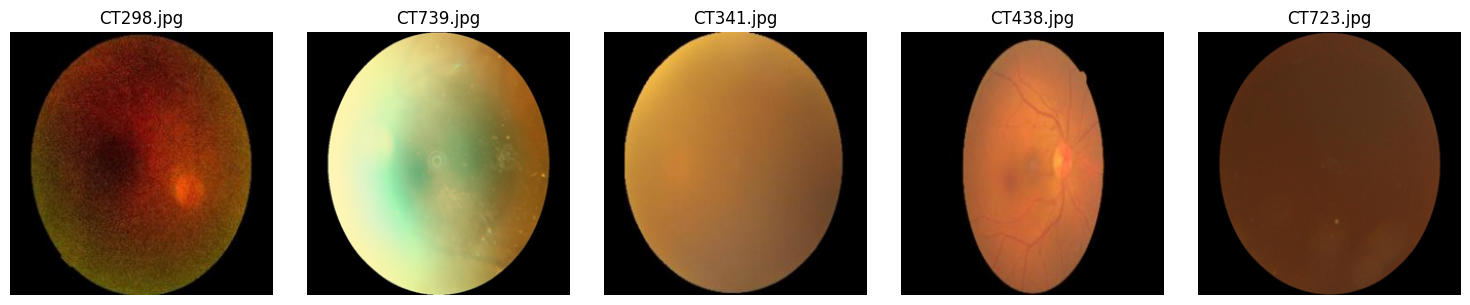

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Cataract"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

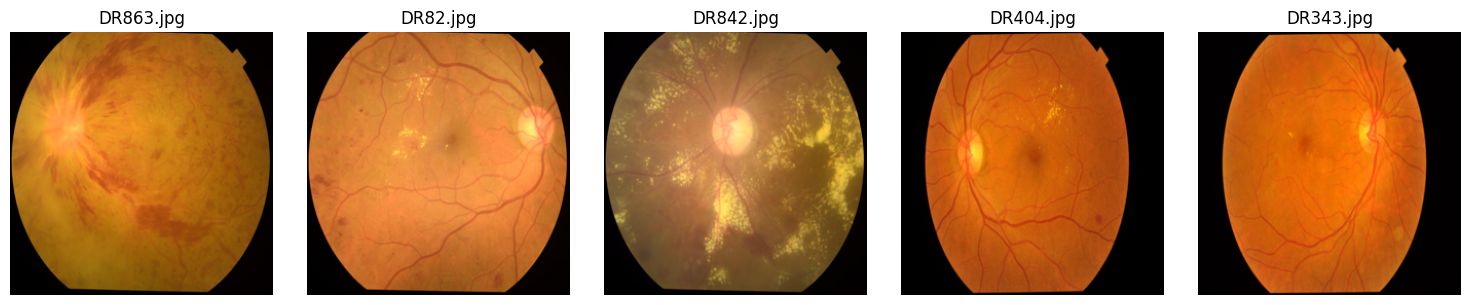

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Diabetic Retinopathy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

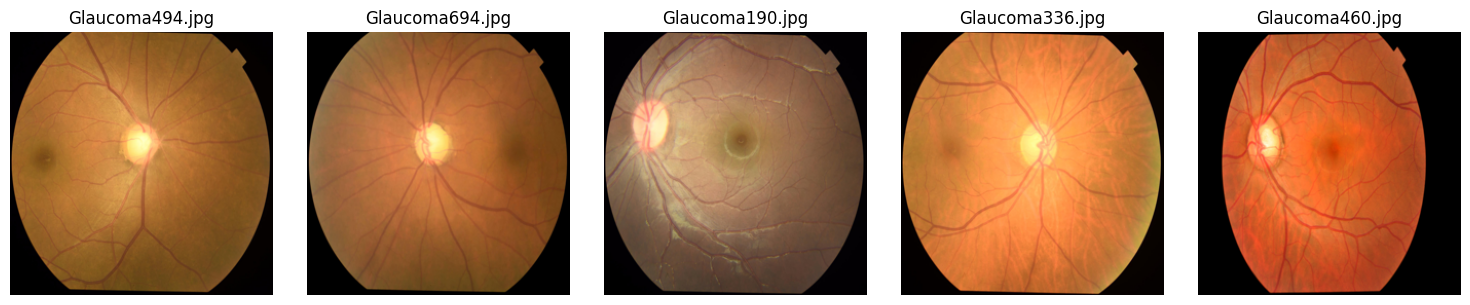

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Glaucoma"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

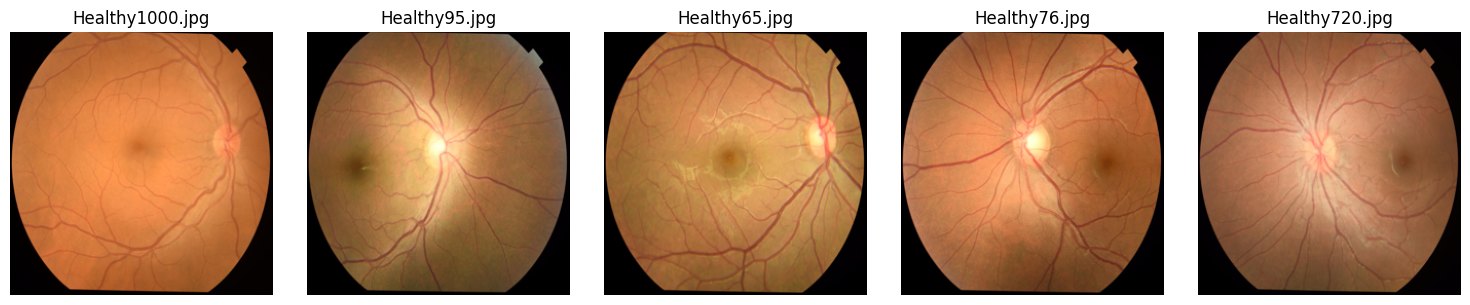

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Healthy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

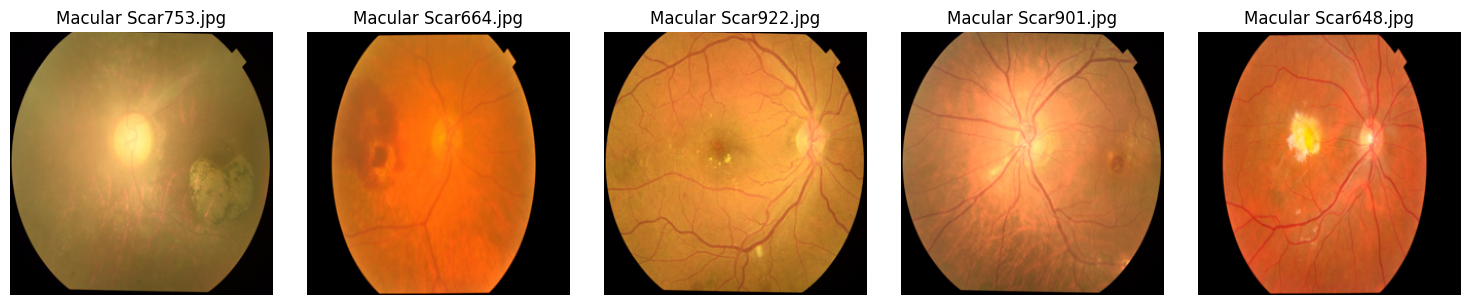

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Macular Scar"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

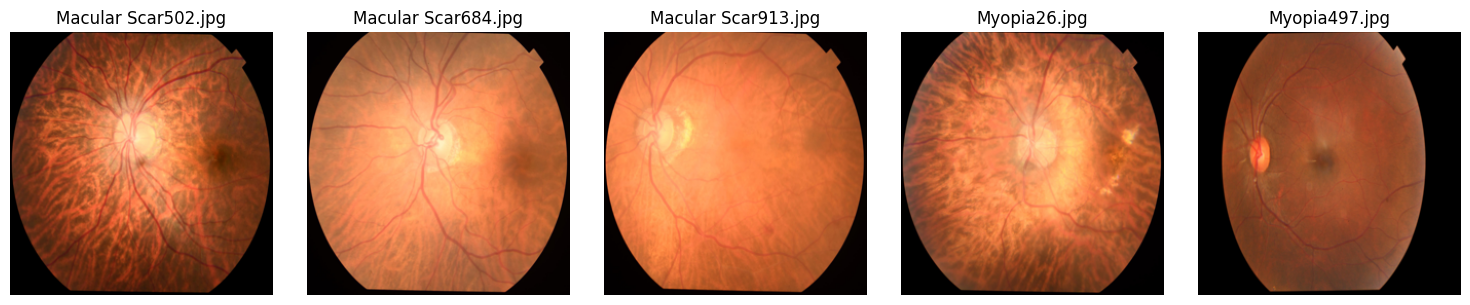

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Myopia"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

In [11]:
from tensorflow.keras import regularizers

base_model = MobileNetV2(weights='imagenet', include_top=False,
                         input_shape=(256, 256, 3))
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(6, activation='softmax', kernel_regularizer = regularizers.l2(0.01))(x)
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()

<ipython-input-11-eeea7d40c696>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 128, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 128, 128, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 128, 128, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 128, 128, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 128, 128, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 128, 128, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 128, 128, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 128, 128, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 128, 128, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 129, 129, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 64, 64, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,916,934 (11.13 MB)

 Trainable params: 2,882,822 (11.00 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
checkpoint_callback = ModelCheckpoint(
    '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

for layer in base_model.layers:
    layer.trainable = False

models.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
# Train the model
history = models.fit(
    x=train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5311 - loss: 5.6614 
Epoch 1: val_accuracy improved from -inf to 0.58583, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 2812s 19s/step - accuracy: 0.5315 - loss: 5.6496 - val_accuracy: 0.5858 - val_loss: 2.0421
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6239 - loss: 1.8141
Epoch 2: val_accuracy improved from 0.58583 to 0.59167, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.6240 - loss: 1.8128 - val_accuracy: 0.5917 - val_loss: 1.4849
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6505 - loss: 1.2910
Epoch 3: val_accuracy improved from 0.59167 to 0.61917, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.6505 - loss: 1.2907 - val_accuracy: 0.6192 - val_loss: 1.2364
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6574 - loss: 1.1672
Epoch 4: val_accuracy improved from 0.61917 to 0.62583, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6574 - loss: 1.1669 - val_accuracy: 0.6258 - val_loss: 1.1522
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6550 - loss: 1.0791
Epoch 5: val_accuracy improved from 0.62583 to 0.65167, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.6551 - loss: 1.0792 - val_accuracy: 0.6517 - val_loss: 1.0855
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6656 - loss: 1.0474
Epoch 6: val_accuracy did not improve from 0.65167
150/150 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.6656 - loss: 1.0473 - val_accuracy: 0.6192 - val_loss: 1.1133
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6708 - loss: 1.0124
Epoch 7: val_accuracy improved from 0.65167 to 0.65417, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.6708 - loss: 1.0125 - val_accuracy: 0.6542 - val_loss: 1.0469
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6866 - loss: 1.0099
Epoch 8: val_accuracy did not improve from 0.65417
150/150 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.6866 - loss: 1.0100 - val_accuracy: 0.6475 - val_loss: 1.0477
Epoch 9/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6780 - loss: 1.0008
Epoch 9: val_accuracy did not improve from 0.65417
150/150 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.6780 - loss: 1.0008 - val_accuracy: 0.6275 - val_loss: 1.0593
Epoch 10/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6826 - loss: 0.9834
Epoch 10: val_accuracy did not improve from 0.65417
150/150 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.6825 - loss: 0.9836 - val_accuracy: 0.6133 - val_loss: 1.1420
Epoch 11/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6614 - loss: 1.0245
Epoch 11: val_accuracy improved 

150/150 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.6614 - loss: 1.0245 - val_accuracy: 0.6567 - val_loss: 1.0011
Epoch 12/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6540 - loss: 1.0340
Epoch 12: val_accuracy improved from 0.65667 to 0.66333, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.6540 - loss: 1.0339 - val_accuracy: 0.6633 - val_loss: 1.0112
Epoch 13/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6664 - loss: 1.0124

In [10]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2.h5'
models = load_model(model_path)

In [11]:
checkpoint_callback = ModelCheckpoint(
    '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2_2.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

models.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [12]:
history_resume = models.fit(
    x=train_generator,
    initial_epoch=12,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 13/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6646 - loss: 1.0219
Epoch 13: val_accuracy improved from -inf to 0.66250, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2_2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 1417s 9s/step - accuracy: 0.6646 - loss: 1.0218 - val_accuracy: 0.6625 - val_loss: 1.0050
Epoch 14/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6736 - loss: 0.9934
Epoch 14: val_accuracy did not improve from 0.66250
150/150 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.6736 - loss: 0.9935 - val_accuracy: 0.6533 - val_loss: 1.0101
Epoch 15/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6773 - loss: 1.0001
Epoch 15: val_accuracy improved from 0.66250 to 0.66917, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2_2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.6773 - loss: 1.0002 - val_accuracy: 0.6692 - val_loss: 0.9794


Final Training Accuracy: 0.668541669845581
Final Validation Accuracy: 0.6691666841506958


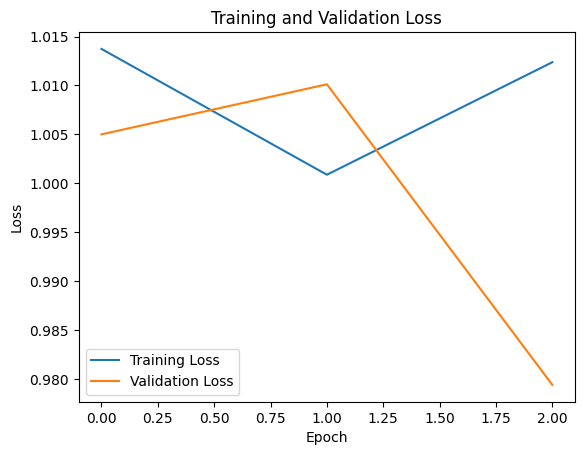

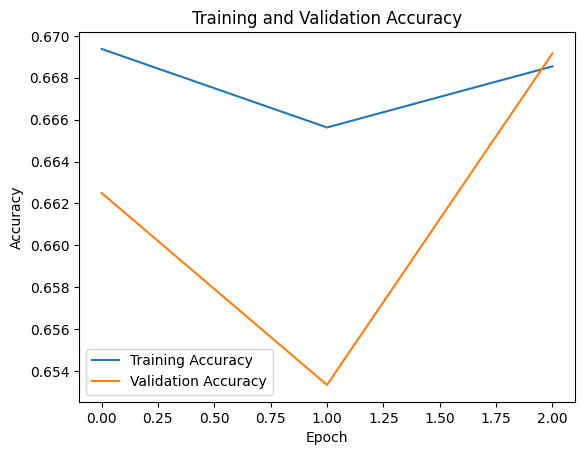

In [17]:
import matplotlib.pyplot as plt

train_accuracy = history_resume.history['accuracy']
val_accuracy = history_resume.history['val_accuracy']
train_loss = history_resume.history['loss']
val_loss = history_resume.history['val_loss']

# In kết quả cuối cùng
print("Final Training Accuracy:", train_accuracy[-1])
print("Final Validation Accuracy:", val_accuracy[-1])

# Vẽ và lưu biểu đồ Loss (webp)
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/loss_plot.webp', format='webp')
plt.show()

# Vẽ và lưu biểu đồ Accuracy (webp)
plt.figure()
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/accuracy_plot.webp', format='webp')
plt.show()


In [18]:
model = load_model('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/eyedisease_bestweight_mobilenetv2_2.h5')

In [19]:
from PIL import Image

validation_img_paths = ["/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Cataract/CT1000.png",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Diabetic Retinopathy/DR104.jpg",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Healthy/Healthy102.jpg",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Glaucoma/Glaucoma126.jpg",
                        "/content/macular_test.jpg",
                        "/content/myopia_test.jpg"]
img_list = [Image.open(img_path) for img_path in validation_img_paths]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


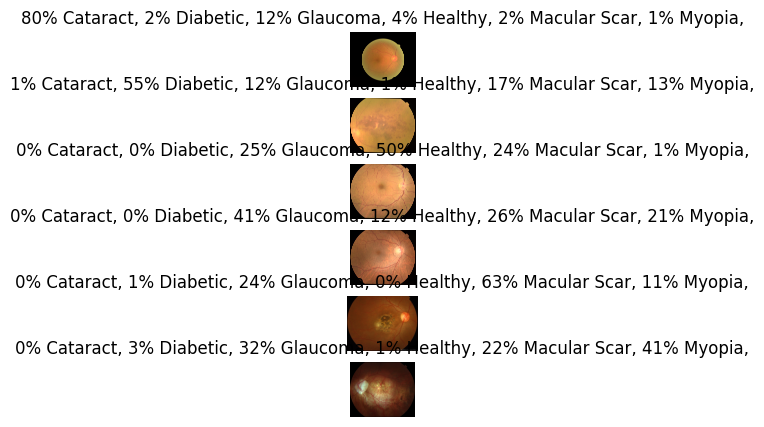

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

validation_batch = np.stack([preprocess_input(np.array(img.resize((256, 256)))) for img in img_list])

pre_prob = model.predict(validation_batch)

fig, axs = plt.subplots(6, 1, figsize=(20, 5))
for i, img in enumerate(img_list):
  ax = axs[i]
  ax.axis('off')
  ax.set_title("{:.0f}% Cataract, {:.0f}% Diabetic, {:.0f}% Glaucoma, {:.0f}% Healthy, {:.0f}% Macular Scar, {:.0f}% Myopia,".format(100*pre_prob[i][0], 100*pre_prob[i][1], 100*pre_prob[i][2], 100*pre_prob[i][3], 100*pre_prob[i][4], 100*pre_prob[i][5]))
  ax.imshow(img)